# DBSCAN Clustering


In [9]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('datasets/fies_df_for_ML.csv')

In [ ]:
# # Remove ID Columns
# id_columns = [
#     "rdmd_id",
#     "region",
#     "province",
#     "household_id",
#     "recoded_province",
#     "psu_recode",
#     "raising_factor",
#     "final_population_weights",
#     'region_with_nir',
#     "income_group",
# ]

In [ ]:
# Pick out Key Columns for Income and Expenditure
summary_columns = [
    
]

In [ ]:
# Drop all ID columns and scale the data
X = dataset['summary_columns']

X.shape

(163268, 110)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# # Reduce dimensionality using PCA
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)  # Adjust to retain ~95% variance
# X_reduced = pca.fit_transform(X_scaled)
# X_reduced.shape

(10000, 2)

In [ ]:
# min_samples = int(np.log(len(X_reduced)))  # Roughly 12
# print(min_samples)

9


In [ ]:
# Configure DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define the grid of hyperparameters
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]  # Smaller steps
min_samples_values = [5, 10, 12]  # Wider range


# Variables to store the best model and score
best_score = -1
best_dbscan = None
best_eps = None
best_min_samples = None

# Iterate through all combinations of hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Testing eps={eps}, min_samples={min_samples}")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit the model and predict labels
        labels = dbscan.fit_predict(X_scaled)  
        print(f'Unique labels: {np.unique(labels)}')
        
        # Ignore noise points (-1) when calculating silhouette score
        if len(set(labels)) > 1:
            unique_labels = set(labels)
            if -1 in unique_labels:
                unique_labels.remove(-1)
            if len(unique_labels) > 1:
                score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
                print(f"Silhouette Score (excluding noise): {score}")

            
            # Update best model if the score improves
            if score > best_score:
                best_score = score
                best_dbscan = dbscan
                best_eps = eps
                best_min_samples = min_samples

# Output the best parameters and model
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

# Fit the best model
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X_scaled)

Testing eps=0.05, min_samples=5
Unique labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110]
Silhouette Score (excluding noise): 0.7131046810827093
Testing eps=0.05, min_samples=10
Unique labels: [-1]
Testing eps=0.05, min_samples=12
Unique labels: [-1]
Testing eps=0.1, min_samples=5
Unique labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  7

DBSCAN(eps=0.05)

In [17]:
labels = dbscan.labels_
unique_labels = np.unique(labels)
print(f"Unique labels: {unique_labels}")

Unique labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110]


/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_43521/2555697550.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {label}", s=20)


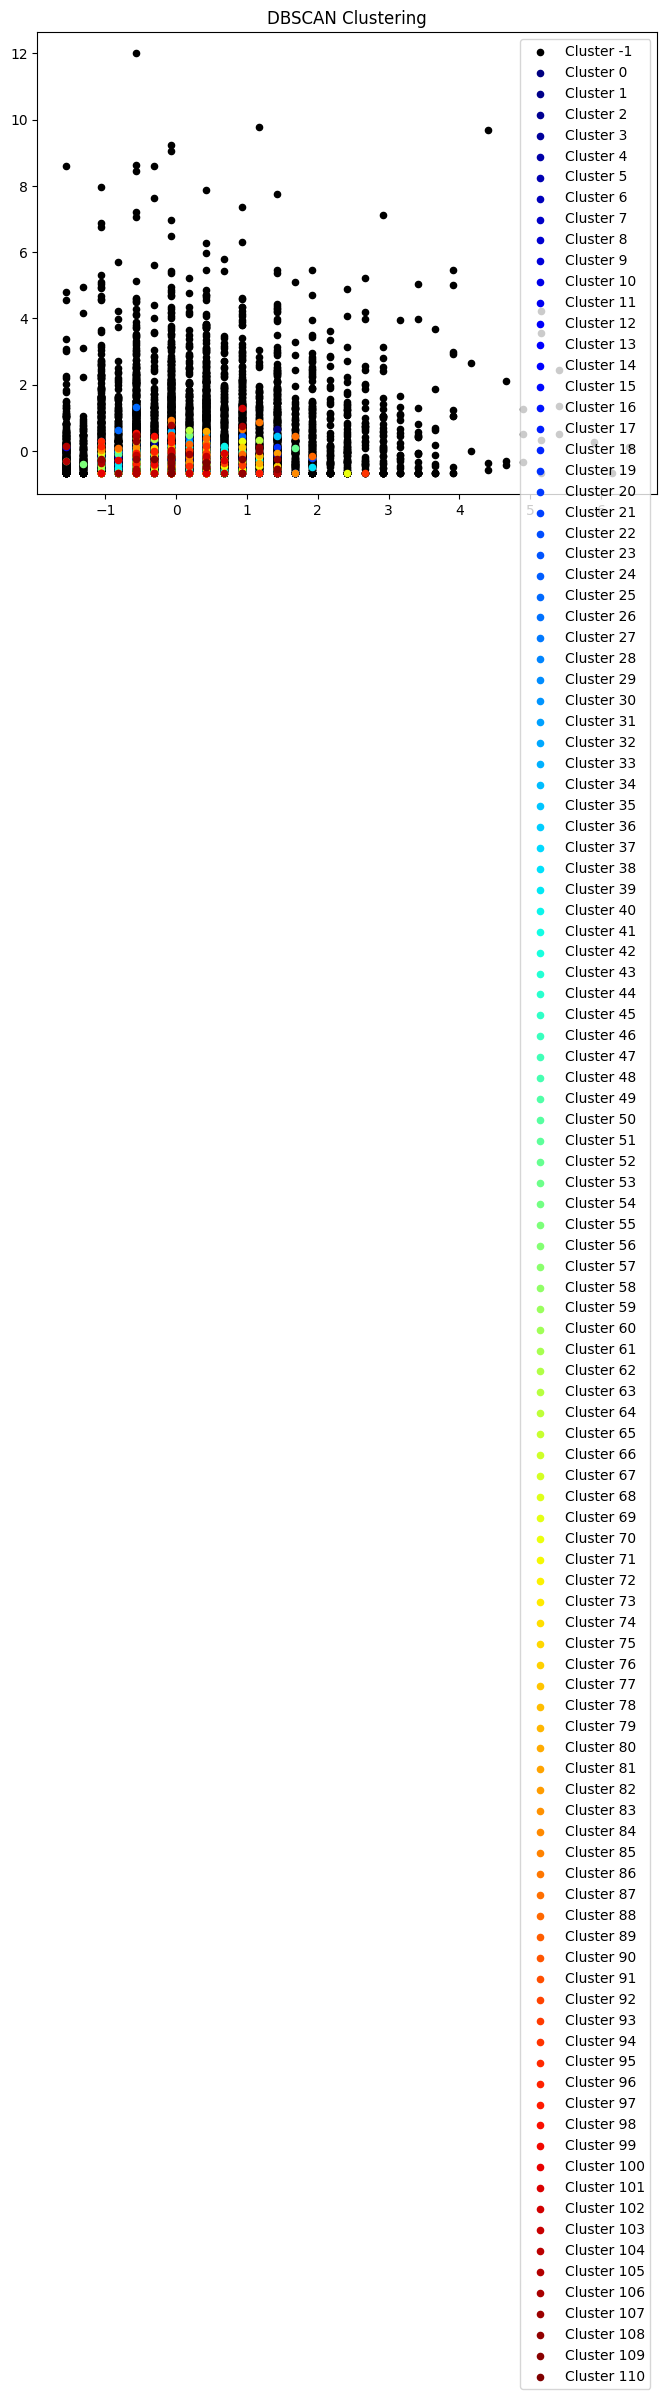

In [18]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    # Points in this cluster
    cluster_points = X_scaled[labels == label]
    
    # Assign a color; noise points (-1) are black
    color = 'k' if label == -1 else plt.cm.jet(float(label) / max(unique_labels))
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {label}", s=20)

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()
